In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

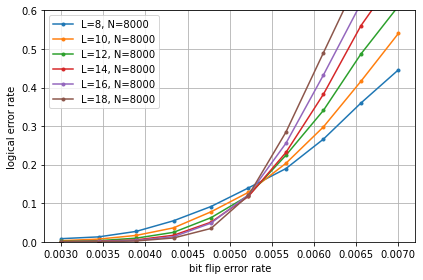

In [266]:
repeat = 10
L_list = [8,10,12,14,16,18]

plt.figure(1)#,figsize=(5,3))
for i_L,L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_new.npz" % (L,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, fail_prob_z, Nrep = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep
    if not first:
        plt.plot(p1_list,fail_prob_avg/Ntot,".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
    # plt.plot(p1_list,fail_prob_avg/Ntot,".-", label="L=%d" % (L))

for i_L,L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_fine.npz" % (L,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, fail_prob_z, Nrep = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep
    # if not first:
        # plt.plot(p1_list,fail_prob_avg/Ntot,".-", color="C%d" % (i_L),label="L=%d, N=%d" % (L,Ntot))
    # plt.plot(p1_list,fail_prob_avg/Ntot,".-", label="L=%d" % (L))


# plt.plot([0.0293,0.0293],[0,0.8],"k--")
# plt.xticks(np.arange(0.004,0.0071,0.001))
# plt.yscale("log")
plt.ylim([0.0,0.6])
plt.xlabel("bit flip error rate")
plt.ylabel("logical error rate")
plt.legend()
plt.tight_layout()
plt.grid()
# plt.savefig("figs/fcts-threshold.pdf")
plt.show()

## with loss

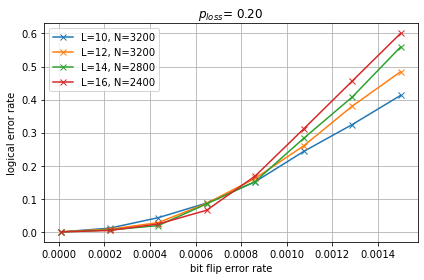

In [420]:
repeat = 20
L_list = [10,12,14,16]
prob_l = 0.2

plt.figure(1)#,figsize=(5,3))
for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_fine.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                loss_prob_avg = 0
                Ntot_loss = 0
                Ntot_flip = 0
                Ntot = 0
            fail_prob_avg += (fail_prob_z+loss_prob)
            loss_prob_avg += loss_prob
            Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
    if not first:
        failure_ratio = fail_prob_avg/Ntot   
        loss_ratio = loss_prob_avg/Ntot   
        # plt.plot(p1_list,failure_ratio,".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
        
    first = True
    for i_rep in range(repeat):
        fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new2.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                loss_prob_avg = 0
                Ntot_loss = 0
                Ntot_flip = 0
                Ntot = 0
            fail_prob_avg += (fail_prob_z+loss_prob)
            loss_prob_avg += loss_prob
            Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
    if not first:
        failure_ratio = fail_prob_avg/Ntot   
        loss_ratio = loss_prob_avg/Ntot   
        plt.plot(p1_list,failure_ratio,"x-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))



plt.legend()
plt.title(r"$p_{loss} $= %.2f " % (prob_l))
# plt.ylim([0.0,0.2])
# plt.xlim([0.0,1e-3])
# plt.xticks(np.arange(0.08,0.131,0.01))
# plt.xticks(np.arange(0.0s6,0.1,0.01))
plt.grid()
plt.xlabel("bit flip error rate")
plt.ylabel("logical error rate")
# plt.legend()
plt.tight_layout()
# plt.savefig("figs/loss_%.2f_toric_threshold.pdf" % (prob_l))
plt.show()

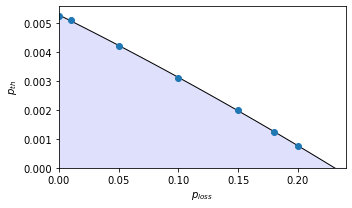

In [450]:
p_loss = [0,0.01,0.05,0.1,0.15,0.18,0.2]
p_th = [0.00525,0.0051,0.0042,0.0031,0.002,0.00125,0.00075]

z = np.polyfit(p_loss, p_th, 2)
x_plot = np.linspace(min(p_loss),1.2*max(p_loss))
y_plot = z[2]+z[1]*x_plot + z[0]*x_plot**2

plt.figure(1,figsize=(5,3))
plt.plot(x_plot,y_plot,"k",linewidth=1)
plt.fill_between(x_plot,y_plot,color="#DFE0FB")
plt.plot(p_loss,p_th,"o")
plt.ylabel(r"$p_{th}$")
plt.xlabel(r"$p_{loss}$")
plt.xticks(np.arange(0,0.21,0.05))
plt.yticks(np.arange(0,0.0051,0.001))
plt.xlim([0,0.24])
plt.ylim([0,1.06*max(p_th)])
plt.tight_layout()
plt.savefig("figs/loss_error_phasediag.pdf")
plt.show()



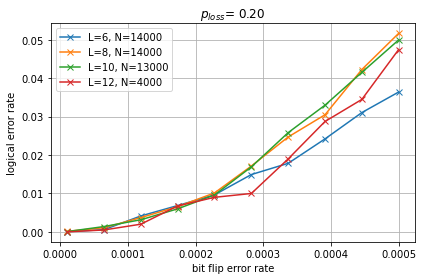

In [371]:
### 0.2 loss
repeat = 14
L_list = [6,8,10,12]
prob_l = 0.2

plt.figure(1)#,figsize=(5,3))
for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_fine.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                loss_prob_avg = 0
                Ntot_loss = 0
                Ntot_flip = 0
                Ntot = 0
            fail_prob_avg += (fail_prob_z+loss_prob)
            loss_prob_avg += loss_prob
            Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
    # if not first:
    #     failure_ratio = fail_prob_avg/Ntot   
    #     loss_ratio = loss_prob_avg/Ntot   
    #     # plt.plot(p1_list,failure_ratio,".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
        
    for i_rep in range(4,4+repeat):
        fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            fail_prob_avg += (fail_prob_z+loss_prob)
            loss_prob_avg += loss_prob
            Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
    if not first:
        failure_ratio = fail_prob_avg/Ntot   
        loss_ratio = loss_prob_avg/Ntot   
        plt.plot(p1_list,failure_ratio,"x-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))



plt.legend()
plt.title(r"$p_{loss} $= %.2f " % (prob_l))
# plt.ylim([0.0,0.6])
# plt.xticks(np.arange(0.08,0.131,0.01))
# plt.xticks(np.arange(0.0s6,0.1,0.01))
plt.grid()
plt.xlabel("bit flip error rate")
plt.ylabel("logical error rate")
# plt.legend()
plt.tight_layout()
# plt.savefig("figs/loss_%.2f_toric_threshold.pdf" % (prob_l))
plt.show()

In [348]:
print(p1_list)

[1.00000000e-05 6.44444444e-05 1.18888889e-04 1.73333333e-04
 2.27777778e-04 2.82222222e-04 3.36666667e-04 3.91111111e-04
 4.45555556e-04 5.00000000e-04]


## compare loss and no loss

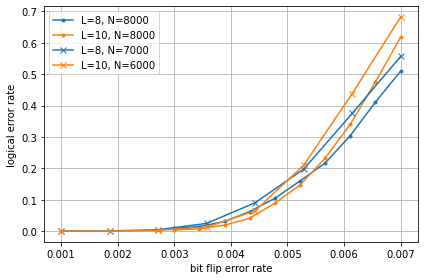

In [280]:
repeat = 24
L_list = [8,10]#[8,10,12,14,16,18]
prob_l = 0.01

plt.figure(1)#,figsize=(5,3))
for i_L,L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_new.npz" % (L,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, fail_prob_z, Nrep = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep
    if not first:
        plt.plot(p1_list,fail_prob_avg/Ntot/(7/8),".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
    # plt.plot(p1_list,fail_prob_avg/Ntot,".-", label="L=%d" % (L))

for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                loss_prob_avg = 0
                Ntot_loss = 0
                Ntot_flip = 0
                Ntot = 0
            fail_prob_avg += (fail_prob_z+loss_prob)
            loss_prob_avg += loss_prob
            Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
    if not first:
        failure_ratio = fail_prob_avg/Ntot   
        loss_ratio = loss_prob_avg/Ntot   
        plt.plot(p1_list,failure_ratio/(7/8),"x-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))

# plt.plot([0.0293,0.0293],[0,0.8],"k--")
# plt.xticks(np.arange(0.004,0.0071,0.001))
# plt.yscale("log")
plt.xlabel("bit flip error rate")
plt.ylabel("logical error rate")
plt.legend()
plt.tight_layout()
plt.grid()
# plt.savefig("figs/fcts-threshold.pdf")
plt.show()